## 第5章 株式データの取得と可視化

### 5.1 Rを利用した株式データ分析入門

#### 5.1.2 株価データのダウンロードと読み込み

In [1]:
# 本章で利用する以下のライブラリ・モジュールを読み込む
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# ch05_32とch05_37で標本サイズの関係でUserWarningカテゴリの警告メッセージが出るので，それが表示されないように制御
import warnings
warnings.filterwarnings("ignore")

In [2]:
# ch05_01: 株式データの読み込み

stock_data = pd.read_csv("ch05_stock_data.csv")

In [3]:
# ch05_02: 株式データの目視

# テキスト形式で表示したければprint(stock_data)とし，HTMLに整形して表示したければdisplay(stock_data)とする
display(stock_data)  

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient,R_F
0,2015,1,1,1,954,0,2422000,1.0,0.000651
1,2015,2,2,1,960,0,2422000,1.0,0.000583
2,2015,3,3,1,1113,0,2422000,1.0,0.000611
3,2015,4,4,1,1081,0,2422000,1.0,0.000685
4,2015,5,5,1,1317,0,2422000,1.0,0.000737
...,...,...,...,...,...,...,...,...,...
95035,2020,8,68,1515,4580,0,8979000,1.0,0.000436
95036,2020,9,69,1515,5014,0,8979000,1.0,0.000463
95037,2020,10,70,1515,5090,0,8979000,1.0,0.000471
95038,2020,11,71,1515,5277,0,8979000,1.0,0.000494


In [4]:
# ch05_03: 配当支払いや発行済株式数変化の例

stock_data[(stock_data['firm_ID'] == 1) & 
           (stock_data['month_ID'].between(27, 30))]

# 以下のコードでも同じ結果が得られる
stock_data.loc[(stock_data['firm_ID'] == 1) & 
               (stock_data['month_ID'].between(27, 30))]
stock_data.query('firm_ID == 1 & 27 <= month_ID <= 30')

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient,R_F
26,2017,3,27,1,4371,0,2422000,1.0,-0.000070
27,2017,4,28,1,4082,0,2906000,1.2,-0.000060
28,2017,5,29,1,3478,0,2906000,1.0,-0.000155
29,2017,6,30,1,4317,43,2906000,1.0,-0.000202


In [5]:
# ch05_04: 調整係数が1以外の値を取る例

stock_data[(stock_data['firm_ID'] == 74) & 
           (stock_data['month_ID'].between(29, 32))]

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient,R_F
4492,2017,5,29,74,2816,0,4960000,1.0,0.000737
4493,2017,6,30,74,1402,11,9920000,2.0,0.000695
4494,2017,7,31,74,1420,0,9920000,1.0,0.000494
4495,2017,8,32,74,1502,0,9920000,1.0,0.000471


### 5.2 時価総額とリターンの計算

#### 5.2.1 時価総額の計算とヒストグラムによる可視化

In [6]:
# ch05_05: 時価総額の追加

stock_data['ME'] = stock_data['stock_price'] * stock_data['shares_outstanding']

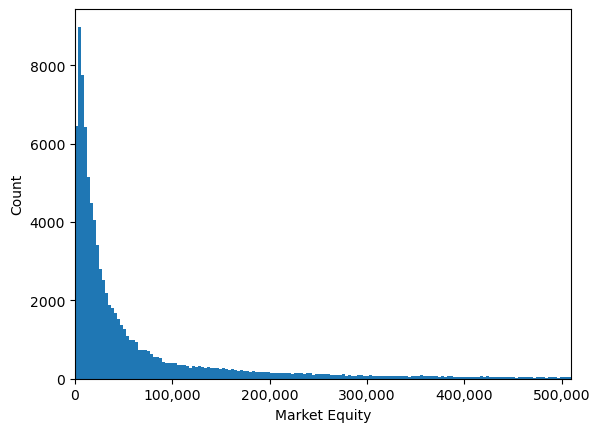

In [7]:
# ch05_06: 時価総額の分布をヒストグラムで可視化

plt.hist(stock_data['ME'], bins='auto')  # ビン数は自動に設定
plt.xlabel('Market Equity')
plt.ylabel('Count')
plt.xlim(0, np.quantile(stock_data['ME'], 0.95))  # x軸の上限を95%点に設定

# 単位を100万円にした上で桁区切りのカンマを追加
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:,.0f}'))

plt.show()

#### 5.2.2 トータル・リターンと超過リターンの計算

In [8]:
# ch05_07: 前月の株価を追加

# firm_IDに関してグループ化し，前月の株価を新たな列lagged_stock_priceとして追加
stock_data['lagged_stock_price'] = stock_data.groupby('firm_ID')['stock_price'].shift(1)

In [9]:
# ch05_08: 月次リターンの追加

# firm_IDに関してグループ化し，前月の株価lagged_stock_priceを新たな列として追加
stock_data['lagged_stock_price'] = stock_data.groupby('firm_ID')['stock_price'].shift(1)

# (5.1)式に従って月次リターンRを計算して新たな列として追加
# (5.1)式に従って月次リターンRを計算して新たな列として追加
stock_data['R'] = ((stock_data['stock_price'] + stock_data['DPS']) *
                   stock_data['adjustment_coefficient'] - 
                   stock_data['lagged_stock_price']
                  ) / stock_data['lagged_stock_price']

In [10]:
# ch05_09: 月次超過リターンの追加

stock_data['Re'] = stock_data['R'] - stock_data['R_F']

#### 5.2.3 株式データの探索的データ分析

In [11]:
# ch05_10: 月次リターンの要約統計量を確認

stock_data['R'].describe()

## count    93525.000000
## mean         0.015859
## std          0.091131
## min         -0.380282
## 25%         -0.040573
## 50%          0.010332
## 75%          0.064808
## max          0.514984
## Name: R, dtype: float64

count    93525.000000
mean         0.015859
std          0.091131
min         -0.380282
25%         -0.040573
50%          0.010332
75%          0.064808
max          0.514984
Name: R, dtype: float64

In [12]:
# ch05_11: 月次リターンの標準偏差と分散を計算

# std()メソッドを使って標準偏差を計算し，print()関数で出力．
print(stock_data['R'].std())  

## 0.09113097915533305

# skipna引数をTrueに指定すると明示的に欠損値を無視するように指定できるが，
# std()メソッドはデフォルトでそれがTrueに設定されているため，上のコードのように書けば良い．
print(stock_data['R'].std(skipna=True))  

## 0.09113097915533305

# var()メソッドを使って分散を計算し，print()関数で出力
print(stock_data['R'].var())  

## 0.008304855361809747

0.09113097915533305
0.09113097915533305
0.008304855361809747


In [13]:
# ch05_12: 月次リターンの歪度を計算

# xというSeriesを与えると歪度を計算するユーザ定義関数skewness()を定義
def skewness(x): 
    n = len(x)
    mean_x = x.mean()
    sd_x = x.std()  
    return (1 / n) * ((x - mean_x) / sd_x).pow(3).sum()  # pow()メソッドは冪乗を計算し，pow(3)で与えられた数値の三乗を返す

# dropna()メソッドを使って欠損値を削除した上でskewness()関数にRを代入
print(skewness(stock_data['R'].dropna()))  

## 0.5065672110667648

# ユーザ定義関数を作成せずとも，pandasには歪度を計算するskew()メソッドが用意されている
print(stock_data['R'].dropna().skew())  # ただし，ユーザ定義関数skewness()とは自由度が異なるため，計算結果に微妙な差異が生じる

## 0.5065834606208761

0.5065672110667648
0.5065834606208761


In [14]:
# ch05_13: 月次リターンの歪度を計算

# xというSeriesを与えると尖度を計算するユーザ定義関数kurtosis()を定義
def kurtosis(x): 
    n = len(x)
    mean_x = x.mean()
    sd_x = x.std()  
    return (1 / n) * ((x - mean_x) / sd_x).pow(4).sum()

print(kurtosis(stock_data['R'].dropna()))

## 4.26804501360828

# 尖度の計算については，kurt()メソッドが用意されている
print(stock_data['R'].dropna().kurt())  # ただし，ユーザ定義関数kurtosiss()とは自由度が異なり，また，3を引くexcess kurtosisを返す

## 1.2682682417191176

4.26804501360834
1.2682682417191176


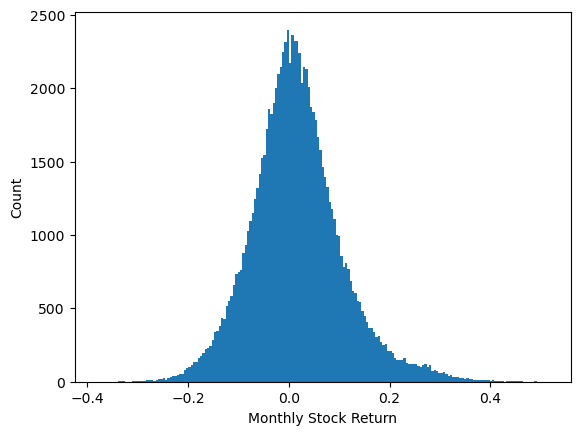

In [15]:
# ch05_14: 月次リターンの分布をヒストグラムで可視化

plt.hist(stock_data['R'], bins='auto') 
plt.xlabel("Monthly Stock Return")
plt.ylabel("Count")
plt.show()

### 5.3 リターンの累積

#### 5.3.2 年次リターンの計算

In [16]:
# ch05_15: 月次リターンを累積して年次リターンを計算 (1)

# ユーザ定義関数を用いる場合
def calculate_BHR(x):  # バイ・アンド・ホールド・リターンを計算するcalculate_BHR()関数を定義
    return (1 + x).prod(skipna=False) - 1  # 欠損値NaNを無視せずに累積リターンを計算するため，skipna引数をFalseに

annual_stock_data = stock_data.groupby(['firm_ID', 'year']).agg(
    # firm_IDとyearでグループ化し，aggメソッドを適用
    R=pd.NamedAgg(column='R', aggfunc=calculate_BHR),  # R列に対してcalculate_BHR()関数を適用
    R_F=pd.NamedAgg(column='R_F', aggfunc=calculate_BHR)  # R_F列に対してcalculate_BHR()関数を適用
)

annual_stock_data['Re'] = annual_stock_data['R'] - annual_stock_data['R_F']  # 月次超過リターンを計算
annual_stock_data = annual_stock_data.reset_index()  # データフレームannual_stock_dataのインデックスをリセット

# apply関数とラムダ関数（無名関数）を使っても同様の結果が得られる
annual_stock_data = stock_data.groupby(['firm_ID', 'year']).apply(
    # firm_IDとyearでグループ化し，apply()関数を適用
    lambda stock_data: pd.Series({
        'R': (1 + stock_data['R']).prod(skipna=False) - 1,
        'R_F': (1 + stock_data['R_F']).prod(skipna=False) - 1
    })
)

annual_stock_data['Re'] = annual_stock_data['R'] - annual_stock_data['R_F']
annual_stock_data = annual_stock_data.reset_index()  # データフレームannual_stock_dataのインデックスをリセット

In [17]:
# ch05_16: 月次リターンを累積して年次リターンを計算 (2)

# 月次リターンRの欠損値を無視して累積リターンを計算するときは，以下のようにシンプルに書ける
stock_data.groupby(['firm_ID', 'year']).agg(
    simple_cumulative_R=('R', 'sum')
).reset_index()

# このケースでは欠損値を無視しないため，以下のように改良する必要がある
stock_data.groupby(['firm_ID', 'year']).agg(
    simple_cumulative_R=pd.NamedAgg(column='R', aggfunc=lambda x: x.sum(skipna=False))
).reset_index()

,firm_ID,year,simple_cumulative_R
0,1,2015,NaN
1,1,2016,0.758762
2,1,2017,0.671160
3,1,2018,-0.185560
4,1,2019,0.529912
...,...,...,...
7915,1515,2016,0.367209
7916,1515,2017,0.428109
7917,1515,2018,-0.084435
7918,1515,2019,0.558736


### 5.4 株式データと財務データを組み合わせた分析

#### 5.4.1 二つのデータセットの結合

In [18]:
# ch05_17: 財務データと株式データの行数を確認

financial_data = pd.read_csv('ch04_output.csv')

len(financial_data)  # 年次財務データの行数

## 7919

len(annual_stock_data)  # 年次リターン・データの行数

## 7920

len(stock_data)  # 月次リターン・データの行数

## 95040

95040

In [19]:
# ch05_18: 年次リターン・データと財務データの結合 (1)

annual_data = pd.merge(annual_stock_data, financial_data, on=['firm_ID', 'year'], how='outer')

# 以下のように書いても一緒
annual_data = annual_stock_data.merge(financial_data, on=['firm_ID', 'year'], how='outer')

**コードch05_19は，R言語特有のものであるため割愛**

In [20]:
# ch05_20: 月次リターン・データと財務データの結合

monthly_data = stock_data.merge(financial_data, on=['firm_ID', 'year'], how='outer')

In [21]:
# ch05_21: full_join()関数による欠損値の処理

A = pd.DataFrame({'firm_ID': [1, 2], 'stock_price': [120, 500]})
B = pd.DataFrame({'firm_ID': [1, 3], 'DPS': [5, 10]})

A.merge(B, how='outer', on='firm_ID')

,firm_ID,stock_price,DPS
0,1,120.0,5.0
1,2,500.0,NaN
2,3,NaN,10.0


In [22]:
# ch05_22: inner_join()関数による欠損値の処理

A.merge(B, how='inner', on='firm_ID')

,firm_ID,stock_price,DPS
0,1,120,5


In [23]:
# ch05_23: left_join()関数，及びright_join()関数による欠損値の処理

A.merge(B, how='left', on='firm_ID')
A.merge(B, how='right', on='firm_ID')

,firm_ID,stock_price,DPS
0,1,120.0,5
1,3,NaN,10


#### 5.4.2 結合後データの探索的データ分析とバブルチャートによる可視化

In [24]:
# ch05_24: 年度末の時価総額を年次データに追加

# 各年度末の時価総額を抽出し，year_end_MEとして定義
year_end_ME = stock_data[stock_data['month'] == 12][['year', 'firm_ID', 'ME']].copy()

# 年次データと結合
annual_data = annual_data.merge(year_end_ME, how='outer', on=['year', 'firm_ID'])

# 時価総額の単位を百万円に
annual_data['ME'] = annual_data['ME'] / 1e6

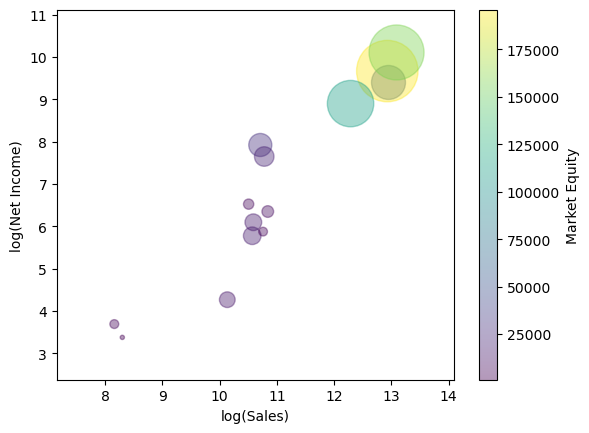

In [25]:
# ch05_25: 売上高・当期純利益・時価総額をバブルチャートで可視化

# 描画したいデータを抽出し，filtered_dataとして定義
filtered_data = annual_data[
    (annual_data['year'] == 2015) & 
    (annual_data['firm_ID'].between(2, 20)) & 
    (annual_data['X'] > 0)
].copy()

# 描画する図をscatterとして定義
scatter = plt.scatter(
    np.log(filtered_data['sales']), 
    np.log(filtered_data['X']), 
    s=filtered_data['ME'] / 100,  # sはバブルの大きさを指定（100で除して適切な大きさに）
    c=filtered_data['ME'],  # cはバブルの色を指定
    alpha=0.4  # alphaはバブルの透明度を指定
)

# その他の設定
plt.xlabel('log(Sales)')
plt.ylabel('log(Net Income)')
plt.colorbar(scatter, label='Market Equity')

# x軸の範囲をlog(sales)の最小値から1を引いた値と，最大値に1を足した値とする
plt.xlim([
    np.log(filtered_data['sales']).min() - 1,
    np.log(filtered_data['sales']).max() + 1
])

# y軸の範囲をlog(X)の最小値から1を引いた値と，最大値に1を足した値とする
plt.ylim([
    np.log(filtered_data['X']).min() - 1, 
    np.log(filtered_data['X']).max() + 1
])

plt.show()

### 5.5 統計的推論入門

#### 5.5.1 リターン・データに関する仮定

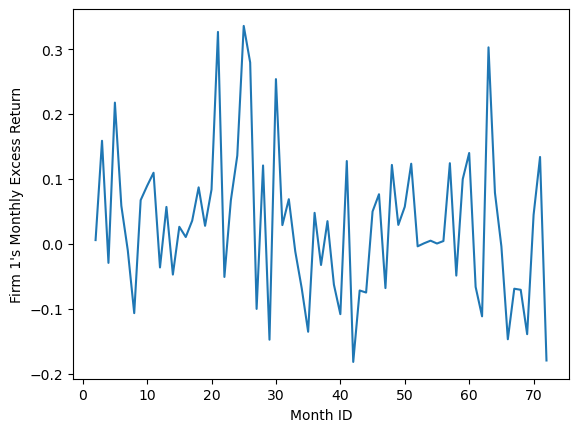

In [26]:
# ch05_26: firm_IDが1の企業の月次超過リターンを折れ線グラフで可視化

firm_1 = stock_data[stock_data['firm_ID'] == 1]  # firm_IDが1の企業のデータのみ抽出

plt.plot(firm_1['month_ID'], firm_1['Re'])  # x軸にmonth_ID, y軸に月次超過リターンを表示
plt.xlabel('Month ID')
plt.ylabel("Firm 1's Monthly Excess Return")
plt.show()

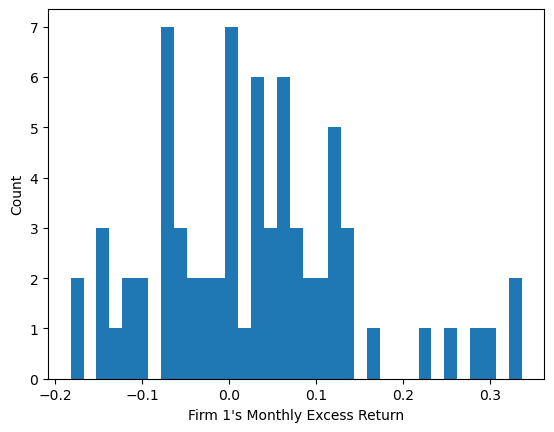

In [27]:
# ch05_27: firm_IDが1の企業の月次超過リターンをヒストグラムで可視化

plt.hist(firm_1['Re'], bins=35)  # Rでのアウトプットに近付けるため，bins引数はautoとせず，35に設定
plt.xlabel("Firm 1's Monthly Excess Return")
plt.ylabel('Count')
plt.show()

#### 5.5.2 推定量と推定値の違い

In [28]:
# ch05_28: firm_IDが1の企業の平均月次超過リターンを計算

firm_1['Re'].mean()

## 0.029060575062250803

0.029060575062250803

#### 5.5.3 $t$値の計算

In [29]:
# ch05_29: 月次超過リターンの期待値に関するt検定 (1)

Re_firm_ID_1 = firm_1['Re'].dropna().to_numpy()  # 欠損値を削除した上で，NumPy配列に変換

mu0 = 0  # 帰無仮説を期待値0と設定
n = len(Re_firm_ID_1)  # 標本サイズ

t_value = (np.mean(Re_firm_ID_1) - mu0) / np.sqrt(np.var(Re_firm_ID_1) / n)  # 定義に従ってt値を計算

## 2.136394204246432

#### 5.5.4 統計的検定の考え方

In [30]:
# ch05_30: 月次超過リターンの期待値に関するt検定 (2)

import scipy.stats as stats  # SciPyの統計関数を使用するためのモジュールを読み込み

t_stat, p_value = stats.ttest_1samp(Re_firm_ID_1, popmean=0)
t_stat, p_value

## (2.121295822799344, 0.03743972152173369)

(2.121295822799344, 0.03743972152173369)

### 5.6 線形回帰入門

#### 5.6.1 線形回帰の概要

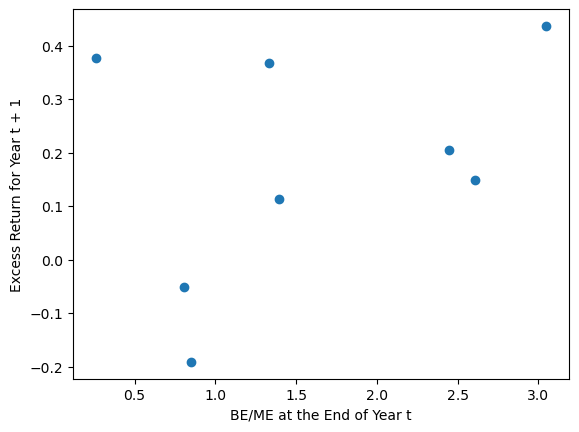

In [31]:
# ch05_31: 簿価時価比率と株式リターンの関係を可視化

annual_data['lagged_ME'] = annual_data.groupby('firm_ID')['ME'].shift(1)  # 前年度の時価総額をlagged_MEとして定義
annual_data['lagged_BEME'] = annual_data['lagged_BE'] / annual_data['lagged_ME']  # 企業ごとに前年度の簿価時価比率を計算

# firm_IDが1から10までの企業の2016年のデータを抽出して，lm_sample_dataとして定義
lm_sample_data = annual_data[
    (annual_data['year'] == 2016) & 
    (annual_data['firm_ID'] <= 10)
].copy()  

lm_sample_data = lm_sample_data[['firm_ID', 'year', 'Re', 'lagged_BEME']].dropna()  # 欠損データを削除し，必要な列のみ抽出

# x軸に簿価時価比率，y軸に超過リターンを配置した散布図を描画
plt.scatter(
    lm_sample_data['lagged_BEME'], 
    lm_sample_data['Re']
)
plt.xlabel("BE/ME at the End of Year t")
plt.ylabel("Excess Return for Year t + 1")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     Re   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.8002
Date:                Sun, 04 Feb 2024   Prob (F-statistic):              0.405
Time:                        08:24:09   Log-Likelihood:                 1.8149
No. Observations:                   8   AIC:                            0.3702
Df Residuals:                       6   BIC:                            0.5291
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0551      0.156      0.354      

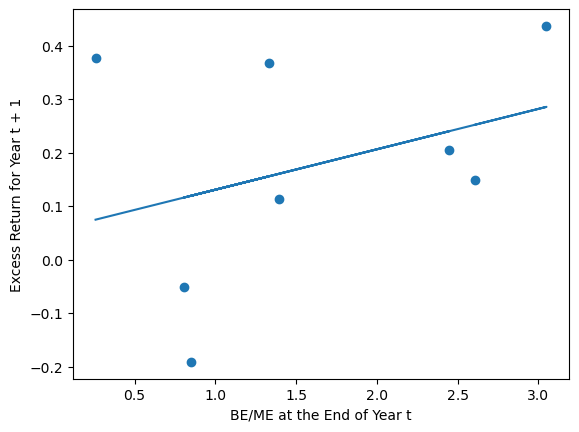

In [32]:
# ch05_32: 簿価時価比率と株式リターンの散布図に回帰直線を追加

import statsmodels.formula.api as smf  # 統計モデルを構築・分析するためのモジュールをインポート

# 回帰結果をlm_resultsに表示し，推定結果の概要を確認
lm_results = smf.ols('Re ~ lagged_BEME', data=lm_sample_data).fit()
print(lm_results.summary())  # summary()メソッドを用いて，回帰結果の概要を表示

# 回帰直線を追加した散布図を描画
plt.scatter(
    lm_sample_data['lagged_BEME'],
    lm_sample_data['Re']
)
plt.plot(
    lm_sample_data['lagged_BEME'],
    lm_results.predict()
)  # predict()メソッドを使って回帰直線を追加
plt.xlabel("BE/ME at the End of Year t")
plt.ylabel("Excess Return for Year t + 1")
plt.show()

**コードch05_33からコードch05_36は，R言語特有のものであるため割愛**

#### 5.6.2 最小二乗推定量

#### 5.6.3 線形回帰モデルの解釈

#### 5.6.4 対数回帰モデル

In [33]:
# ch05_37: 線形・対数モデルによる推定

lm_results = smf.ols('Re ~ np.log(lagged_BEME)', data=lm_sample_data).fit()

# 係数推定値やt値などを一つのデータフレームdfに集約
df = lm_results.summary2().tables[1]

display(df)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,0.167208,0.086827,1.925758,0.102445,-0.045250,0.379667
np.log(lagged_BEME),0.035517,0.109113,0.325502,0.755853,-0.231474,0.302507


In [34]:
# ch05_38: データの保存

monthly_data.to_csv("ch05_output1.csv", index=False)
annual_data.to_csv("ch05_output2.csv", index=False)

In [35]:
# 以上のコードについて，動作確認をした実行環境の表示
# 本セルは，実行環境の確認のためであり，無視してもらっても構わない
import session_info
session_info.show(dependencies=False)